In [1]:
library(cpop)

Loading required package: crops

Loading required package: pacman


Attaching package: ‘cpop’


The following objects are masked from ‘package:stats’:

    fitted, simulate


The following object is masked from ‘package:methods’:

    show




In [2]:
data("wavenumber_spectra")

In [3]:
x <- log(wavenumber_spectra[-(1:3),1])
y <- log(wavenumber_spectra[-(1:3),4])

In [4]:
grid <- seq(from=min(x),to=max(x),length=200)

In [5]:
sig2 <- mean( diff( diff(y) )^2 )/6 

In [6]:
res <- cpop(y, x, grid, sd = sqrt(sig2), minseg = 0.2, beta = 2*log(200))

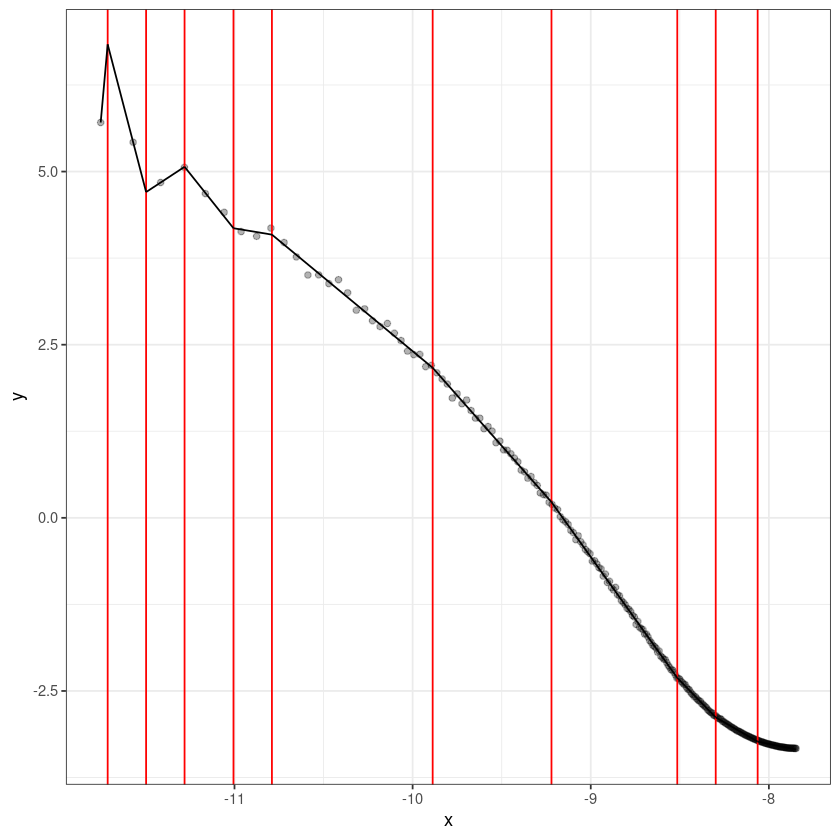

In [7]:
p.2 <- plot(res)
print(p.2)

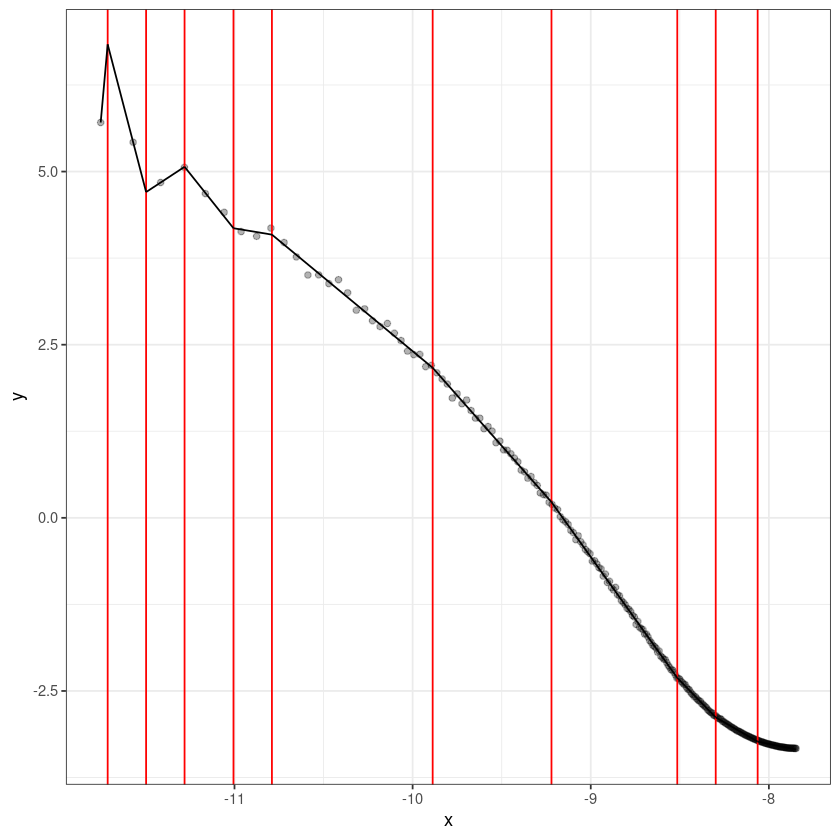

In [15]:
p.2 <- plot(res)
print(p.2)

In [9]:
r2 <- residuals(res)^2
loglik <- function(par)
{
    return(length(r2) * par[1] + par[2] * sum(x) + sum( r2/ (exp(par[1]+par[2]*x) )) )
}

In [10]:
est.hat <- optim( c(0,0) , loglik)

In [11]:
sig2 <- exp(est.hat$par[1] + est.hat$par[2]*x)

In [12]:
res2 <- cpop(y, x, grid , sd=sqrt(sig2), minseg= 0.2, beta=2 * log(200))

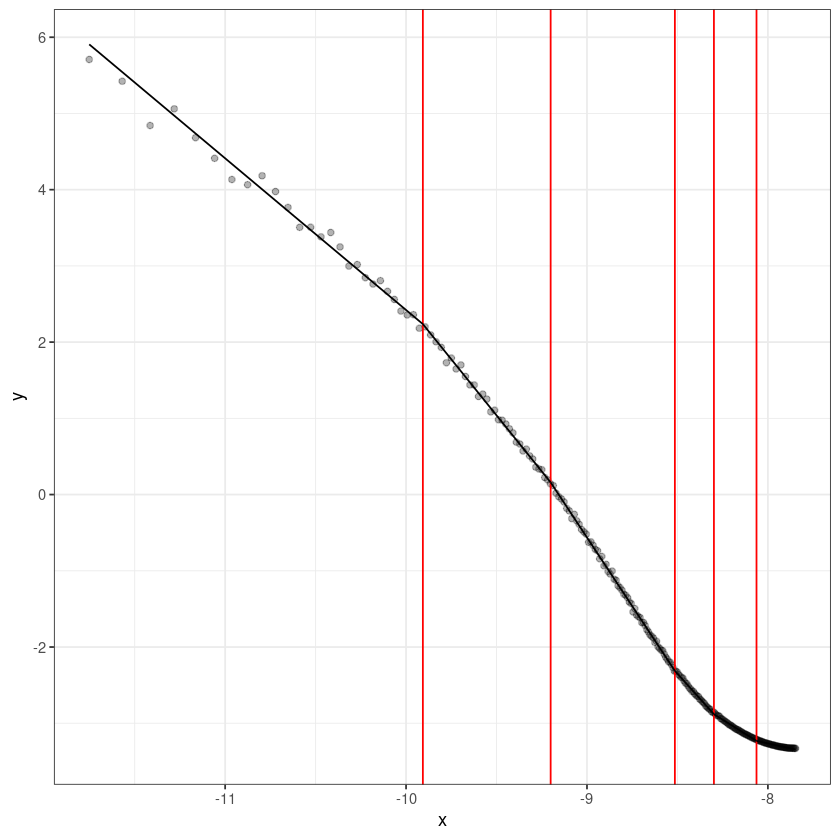

In [17]:
p.3 <- plot(res2)
print(p.3)

In [21]:
library(pacman)
p_load(tidyr,ggplot2,dplyr)

In [22]:
data <-  wavenumber_spectra %>%  mutate_all(log) %>% rename_all( ~ paste0("log_", .x))

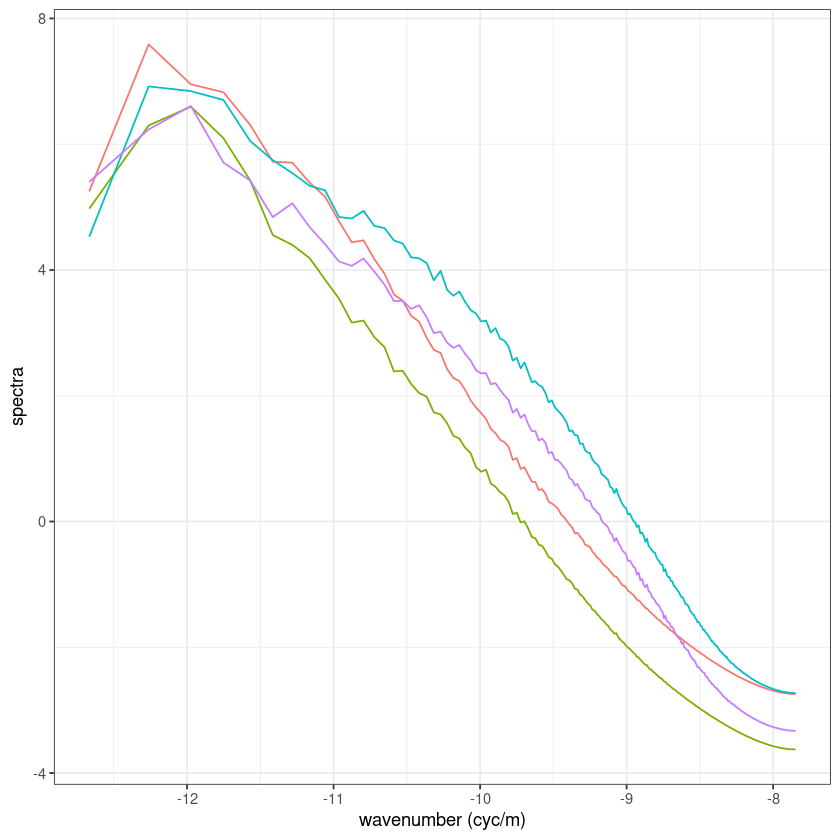

In [31]:
p.1 <- data %>%
gather(variable,log_power_spectra,-log_wavenumber) %>%
ggplot(aes(x=log_wavenumber, y=log_power_spectra, colour=variable)) +
geom_line() + 
theme_bw() +
theme(legend.position="none") +
labs(y= "spectra", x = "wavenumber (cyc/m)")

plot(p.1)